### 수화 자음, 모음 분류모델 만들기

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import glob

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import matplotlib.pyplot as plt

In [3]:
filepath='./newHAND/'
file_names = os.listdir(filepath)

len(os.listdir(filepath+file_names[0]))

294

In [4]:
# 폴더 불러오기
filepath='./newHAND/'
files=glob.glob(filepath+'*')
files

['./newHAND\\J1',
 './newHAND\\J10',
 './newHAND\\J11',
 './newHAND\\J12',
 './newHAND\\J13',
 './newHAND\\J14',
 './newHAND\\J2',
 './newHAND\\J3',
 './newHAND\\J4',
 './newHAND\\J5',
 './newHAND\\J6',
 './newHAND\\J7',
 './newHAND\\J8',
 './newHAND\\J9',
 './newHAND\\M1',
 './newHAND\\M10',
 './newHAND\\M11',
 './newHAND\\M12',
 './newHAND\\M13',
 './newHAND\\M14',
 './newHAND\\M15',
 './newHAND\\M16',
 './newHAND\\M17',
 './newHAND\\M2',
 './newHAND\\M3',
 './newHAND\\M4',
 './newHAND\\M5',
 './newHAND\\M6',
 './newHAND\\M7',
 './newHAND\\M8',
 './newHAND\\M9']

### 이미지 전처리

In [5]:
data_list = []
label_list = []
label_Dict={
    'J1': 0, 'J2': 1, 'J3': 2, 'J4': 3, 'J5': 4, 'J6': 5, 'J7': 6, 'J8': 7, 'J9': 8, 'J10': 9,
    'J11': 10, 'J12': 11, 'J13': 12, 'J14': 13, 'M1': 14, 'M2': 15, 'M3': 16, 'M4': 17, 'M5': 18,
    'M6': 19, 'M7': 20, 'M8': 21, 'M9': 22, 'M10': 23, 'M11': 24, 'M12': 25, 'M13': 26, 'M14': 27,
    'M15': 28, 'M16': 29, 'M17': 30
}

for image_folder in files:
    imgs = glob.glob(image_folder + '/*')
    label_list.extend(str(label_Dict[f'{image_folder[10:]}'])*len(imgs))
    label = label_Dict[f'{image_folder[10:]}']

    for img_path in imgs:
        # 이미지 파일 읽기 
        img = cv2.imread(img_path) #,cv2.IMREAD_GRAYSCALE
        data_list.append(img)
        label_list.append(label)

# 리스트를 NumPy 배열로 변환
imgNP = np.array(data_list).astype('uint8')     # 용량 많.astype('uint16')으면  # 써서 줄이기
label = np.array(label_list)

#스케일링
imgNP=imgNP/255    # 배경 흑백 하고 싶으면 (255-imgNP)

print(imgNP.shape, label.shape,imgNP.ndim)

(9114, 28, 28, 3) (9114,) 4


In [6]:
# 라벨 원핫인코딩
# from keras.utils import to_categorical
# label_encoded=to_categorical(label)
# label_encoded

### CNN모델만들기

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split

In [8]:
trainx,testx, trainy,testy=train_test_split(imgNP,label)

In [9]:
trainx.shape

(6835, 28, 28, 3)

In [10]:
trainy.shape

(6835,)

In [11]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,3),activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(31,activation=('softmax')))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
# 모델 구조 출력 및 이미지 파일로 저장
# from tensorflow.python.keras.utils.vis_utils import plot_model
# from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
modelpath='./NewFile'

mpath=modelpath+'/bestt_test.h5'

mcCB=ModelCheckpoint(filepath=mpath, monitor='val_loss',verbose=1, save_best_only=True)

In [15]:
if not os.path.exists(modelpath):
    os.mkdir(modelpath)
    print(f'{modelpath} 생성')

In [16]:
# 조기종료 처리 콜백 객체

# esCB=EarlyStopping()

In [17]:
# 에포크마다의 학습률 제어 콜백객체

def scheduler(epoch,lr):
    if epoch>10:
        return lr*0.00001
    else:
        return lr
    

lrCB=LearningRateScheduler(scheduler)

In [18]:
EPOCHS=100
BATCH_SIZE=32

# 학습진행
result=model.fit(trainx,trainy,validation_data=(testx,testy) ,epochs=EPOCHS, callbacks=[mcCB,lrCB],verbose=1)

Epoch 1/100
214/214 [==============================] - ETA: 0s - loss: 2.7750 - accuracy: 0.2013
Epoch 1: val_loss improved from inf to 1.38980, saving model to ./NewFile\bestt_test.h5
214/214 [==============================] - 14s 61ms/step - loss: 2.7750 - accuracy: 0.2013 - val_loss: 1.3898 - val_accuracy: 0.6556 - lr: 0.0010
Epoch 2/100
214/214 [==============================] - ETA: 0s - loss: 1.3479 - accuracy: 0.5659
Epoch 2: val_loss improved from 1.38980 to 0.51814, saving model to ./NewFile\bestt_test.h5
214/214 [==============================] - 13s 61ms/step - loss: 1.3479 - accuracy: 0.5659 - val_loss: 0.5181 - val_accuracy: 0.8916 - lr: 0.0010
Epoch 3/100
213/214 [============================>.] - ETA: 0s - loss: 0.7746 - accuracy: 0.7383
Epoch 3: val_loss improved from 0.51814 to 0.24327, saving model to ./NewFile\bestt_test.h5
214/214 [==============================] - 11s 51ms/step - loss: 0.7735 - accuracy: 0.7387 - val_loss: 0.2433 - val_accuracy: 0.9500 - lr: 0.0010

In [19]:
y_vloss=result.history['val_loss']
y_loss=result.history['loss']

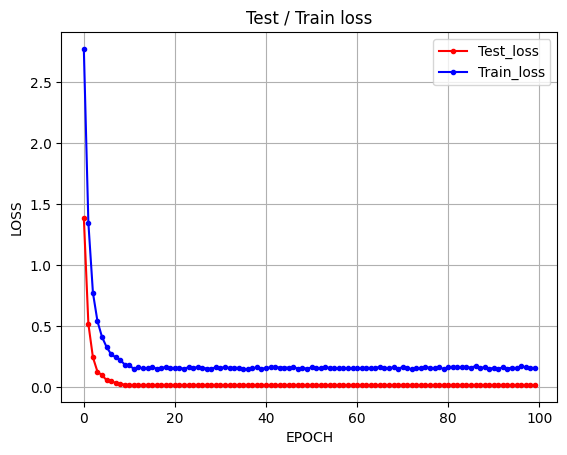

In [20]:
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Test_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train_loss')

plt.legend()
plt.grid()
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('Test / Train loss')
plt.show()


In [24]:
y_vaccuracy=result.history['val_accuracy']
y_accuracy=result.history['accuracy']

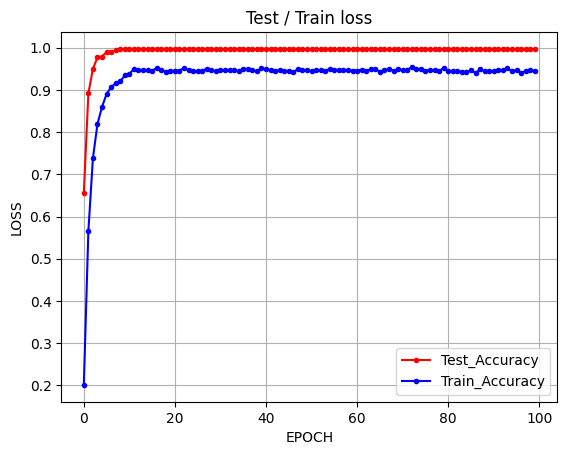

In [25]:
x_len=np.arange(len(y_accuracy))
plt.plot(x_len,y_vaccuracy,marker='.',c='red',label='Test_Accuracy')
plt.plot(x_len,y_accuracy,marker='.',c='blue',label='Train_Accuracy')

plt.legend()
plt.grid()
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.title('Test / Train  Accuracy')
plt.show()

In [ ]:
score = model.evaluate(testx, testy)
print()
print('Score : ',score)
print()
print("Test Loss : ", score[0])
print()
print("Test Accuracy : ", score[1])

72/72 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9987

Score :  [0.01259173545986414, 0.9986836314201355]

Test Loss :  0.01259173545986414

Test Accuracy :  0.9986836314201355
